# Raspagem dos Gastos Diretos por Órgão Executor

No Portal da Transparência do Governo Federal iremos obter os dados de gastos diretos de alguns órgãos do Executivo Federal, ao longo dos últimos 5 anos

## Estratégia
Primeiro vamos ao site analisar a página e traçar uma estratégia para obter os dados.

Podemos ver que precisamos do Ano e do CodigoOS, que é o código do órgão. Navegando pelas páginas com os dados de cada órgão podemos visualizar a URL formada e gurdar os códigos que queremos

In [1]:
# Importando as bibliotecas
import requests
from bs4 import BeautifulSoup as bs


In [2]:
# Vamos fazer primeiro para apenas 1 órgão -> MCTIC
# Analisando a página verificamos que podemos obter os dados informando o Ano e o CodigoOS
# MCTIC -> CodigoOS=24000

url = 'http://www.portaltransparencia.gov.br/PortalComprasDiretasOEOrgaoSubordinado.asp?Ano=2018&CodigoOS=24000'

resposta = requests.get(url)

resposta.text

'\r\n<!DOCTYPE HTML>\r\n<html lang="pt-BR">\r\n<head>\r\n  <title>\r\n    Portal da Transparência - Gastos Diretos por Órgão Executor\r\n  </title>\r\n  <meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" />\r\n\r\n  <link rel="shortcut icon" href="/favicon.ico?v=4.38.3" />\r\n  <link rel="icon" type="image/png" href="/images/favicon.png?v=4.38.3" />\r\n  \r\n  <script src="../RecursosJS/jquery-1.11.0.min.js" type="text/javascript"></script>\r\n\r\n  <!--[if IE]>\r\n  <script src="/RecursosJS/placeholders.min.js"></script>\r\n<![endif]-->\r\n\r\n  <link rel=\'stylesheet\' type=\'text/css\' href=\'/css/portal.css?v=4.38.3\' />\r\n</head>\r\n<body>\r\n  <!--[if gt IE 8]>\r\n<div id="barra-brasil">\r\n    <a href="http://brasil.gov.br" style="background:black; height: 20px; padding:4px 0 4px 10px; display: block; font-family:sans,sans-serif; text-decoration:none; color:white; ">Portal do Governo Brasileiro</a>\r\n</div>\r\n<![endif]-->\r\n\r\n<!--[if !IE]> -->\r\n<div 

In [3]:
# Para obter as informações que queremos na página primeiro precisamos processar essa sopa de letrinhas
# e fazemos isso usando a biblioteca BeautifulSoup
html_soup = bs(resposta.text, 'html.parser')
html_soup


<!DOCTYPE HTML>

<html lang="pt-BR">
<head>
<title>
    Portal da Transparência - Gastos Diretos por Órgão Executor
  </title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/favicon.ico?v=4.38.3" rel="shortcut icon"/>
<link href="/images/favicon.png?v=4.38.3" rel="icon" type="image/png"/>
<script src="../RecursosJS/jquery-1.11.0.min.js" type="text/javascript"></script>
<!--[if IE]>
  <script src="/RecursosJS/placeholders.min.js"></script>
<![endif]-->
<link href="/css/portal.css?v=4.38.3" rel="stylesheet" type="text/css"/>
</head>
<body>
<!--[if gt IE 8]>
<div id="barra-brasil">
    <a href="http://brasil.gov.br" style="background:black; height: 20px; padding:4px 0 4px 10px; display: block; font-family:sans,sans-serif; text-decoration:none; color:white; ">Portal do Governo Brasileiro</a>
</div>
<![endif]-->
<!--[if !IE]> -->
<div id="barra-brasil">
<a href="http://brasil.gov.br" style="background:black; height: 20px; padding:4px 0 4px 10px; display: 

In [4]:
# Agora precisamos identificar as tags HTML correspondentes ao texto que queremos
# e usar o BeautifulSoup para retornar apenas esses elementos
print(html_soup.find_all('td', class_ = 'colunaValor'))

[<td class="colunaValor">
                621.549.202.753,09
            </td>, <td class="colunaValor">
                2.278.517.804,53
            </td>, <td class="colunaValor">
              10.272.803,97
            </td>, <td class="colunaValor">
              150.509.707,95
            </td>, <td class="colunaValor">
              27.496.134,02
            </td>, <td class="colunaValor">
              295.568.881,75
            </td>, <td class="colunaValor">
              406.985.738,87
            </td>, <td class="colunaValor">
              304.585,10
            </td>, <td class="colunaValor">
              6.233,77
            </td>, <td class="colunaValor">
              128.431.191,31
            </td>, <td class="colunaValor">
              201.525.448,84
            </td>, <td class="colunaValor">
              941.366.278,36
            </td>, <td class="colunaValor">
              116.050.800,59
            </td>]


In [5]:
# Obter os dados e guardar em uma estrutura
valores = html_soup.find_all('td', class_ = 'colunaValor')

# Agora vamos filtrar somente o texto do valor que queremos e vamos limpar os espaços
valor = valores[1].text.strip()

valor

'2.278.517.804,53'

In [6]:
# Valor está como string e precisa ser transformado em float
# Trocar pontos por nada
valor = valor.replace('.', '')
# Trocar virgula por ponto
valor = valor.replace(',', '.')
# Transformar em float
valor = float(valor)

valor

2278517804.53

In [7]:
# Obter os dados de gastos diretos dos ultimos 5 anos do MCTIC

# Criar uma lista com os anos para depois fazer um for nessa lista e requisitar ano a ano
anos = ['2014', '2015', '2016', '2017', '2018']

# Criar lista vazia dos gastos
gastos = []

# Percorrer a lista de anos
for ano in anos:
    # Montar a URL de requisicao
    url = f'http://www.portaltransparencia.gov.br/PortalComprasDiretasOEOrgaoSubordinado.asp?Ano={ano}&CodigoOS=24000'
    # Requisitar a pagina
    resposta = requests.get(url)
    # Processar a sopa de letrinhas
    html_soup = bs(resposta.text, 'html.parser')
    # Extrair todos os valores
    valores = html_soup.find_all('td', class_ = 'colunaValor')
    # Pegar apenas 1 valor
    valor = valores[1].text.strip()
    # Trocar pontos por nada
    valor = valor.replace('.', '')
    # Trocar virgula por ponto
    valor = valor.replace(',', '.')
    # Transformar em float
    valor = float(valor)
    # Adicionar o valor na lista
    gastos.append(valor/1000000000)

# Imprimir gastos
gastos

[8.417802107850001,
 6.90502245512,
 7.13479030923,
 9.08492011687,
 2.2785178045300003]

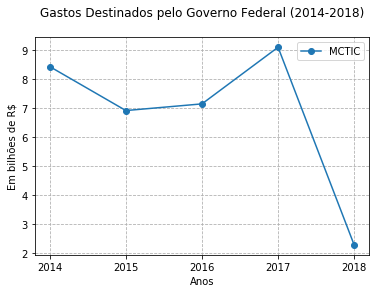

In [8]:
# Plotar os valores em um gráfico de linhas
import matplotlib.pyplot as plt
# Configurar para o grafico aparecer no notebook
%matplotlib inline

# Criar o grafico
plt.grid(True, linestyle="--")
plt.plot(anos, gastos, label='MCTIC', marker='o')
plt.title("Gastos Destinados pelo Governo Federal (2014-2018)\n")
plt.xlabel("Anos")
plt.ylabel("Em bilhões de R$")
legend = plt.legend()
plt.show()

In [ ]:
# Exercicio -> Fazer para outros orgaos
# Pegar o codigo de cada orgao na mão
# Guardar em uma lista